In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from faceparsing.test import evaluate

In [2]:

def handle_parsing_1(parsed):
    """
    From SCGAN scripts
    """
    seg = np.array(parsed)
    new = np.zeros_like(seg)
    new[seg == 0] = 0
    new[seg == 1] = 4
    new[seg == 2] = 7
    new[seg == 3] = 2
    new[seg == 4] = 6
    new[seg == 5] = 1
    new[seg == 6] = 8
    new[seg == 7] = 9
    new[seg == 8] = 11
    new[seg == 9] = 13
    new[seg == 10] = 12
    new[seg == 11] = 3
    new[seg == 12] = 5
    new[seg == 13] = 10
    return Image.fromarray(new)


def handle_parsing_2(parsed):
    """
    To match SCGAN segmentation
    """
    seg = np.array(parsed)
    new = np.zeros_like(seg)
    new[seg == 0] = 0
    new[seg == 1] = 4    # +
    new[seg == 2] = 7    # +
    new[seg == 3] = 2    # +
    new[seg == 4] = 6    # +
    new[seg == 5] = 1    # +
    new[seg == 6] = 5    # ?
    new[seg == 7] = 3    # +
    new[seg == 8] = 5    # ?
    new[seg == 9] = 0    # ?
    new[seg == 10] = 8   # +
    new[seg == 11] = 11  # +
    new[seg == 12] = 9   # +
    new[seg == 13] = 13  # +
    new[seg == 14] = 10  # +
    new[seg == 15] = 5   # ?
    new[seg == 16] = 5   # ?
    new[seg == 17] = 12  # +
    return Image.fromarray(new)


def handle_parsing_3(parsed):
    """
    To match SCGAN segmentation, better?
    """
    seg = np.array(parsed)
    new = np.zeros_like(seg)
    new[seg == 0] = 0
    new[seg == 1] = 4    # +
    new[seg == 2] = 7    # +
    new[seg == 3] = 2    # +
    new[seg == 4] = 6    # +
    new[seg == 5] = 1    # +
    new[seg == 6] = 0    # ?
    new[seg == 7] = 3    # +
    new[seg == 8] = 5    # ?
    new[seg == 9] = 0    # ?
    new[seg == 10] = 8   # +
    new[seg == 11] = 11  # +
    new[seg == 12] = 9   # +
    new[seg == 13] = 13  # +
    new[seg == 14] = 10  # +
    new[seg == 15] = 0   # ?
    new[seg == 16] = 0   # ?
    new[seg == 17] = 12  # +
    return Image.fromarray(new)


In [3]:
def get_region(scgan, parsed):
    scgan = scgan.resize((256, 256), Image.BILINEAR)
    scgan_array = np.array(scgan)
    scgan_labels = np.unique(scgan_array)
    
    parsed = parsed.resize((256, 256), Image.BILINEAR)
    parsed_array = np.array(parsed)
    parsed_labels = np.unique(parsed_array)
    
    n = max(scgan_labels.max(), parsed_labels.max()) + 1
    
    fig, ax = plt.subplots(n, 2, figsize=(6, 48))
    
    for i in range(0, n):
        selected_scgan = np.zeros_like(scgan_array)
        msk_scgan = scgan_array == i
        selected_scgan[msk_scgan] = 100
        
        ax[i][0].imshow(selected_scgan)
        ax[i][0].axis("off")
        ax[i][0].set_title(f"{i}")
        
        selected_parsed = np.zeros_like(parsed_array)
        msk_parsed = parsed_array == i
        selected_parsed[msk_parsed] = 100
        
        ax[i][1].imshow(selected_parsed)
        ax[i][1].axis("off")
        ax[i][1].set_title(f"{i}")


def test(scgan_img_folder, scgan_mask_path):
    scgan = Image.open(scgan_mask_path)
    parsed = Image.fromarray(evaluate(dspth=scgan_img_folder, cp="79999_iter.pth")[0].astype(np.uint8))
    
    # get_region(scgan, parsed)
    get_region(scgan, handle_parsing_3(parsed))

[ 0  1  2  3  4  5  7  9 10 11 12 13 14 17]


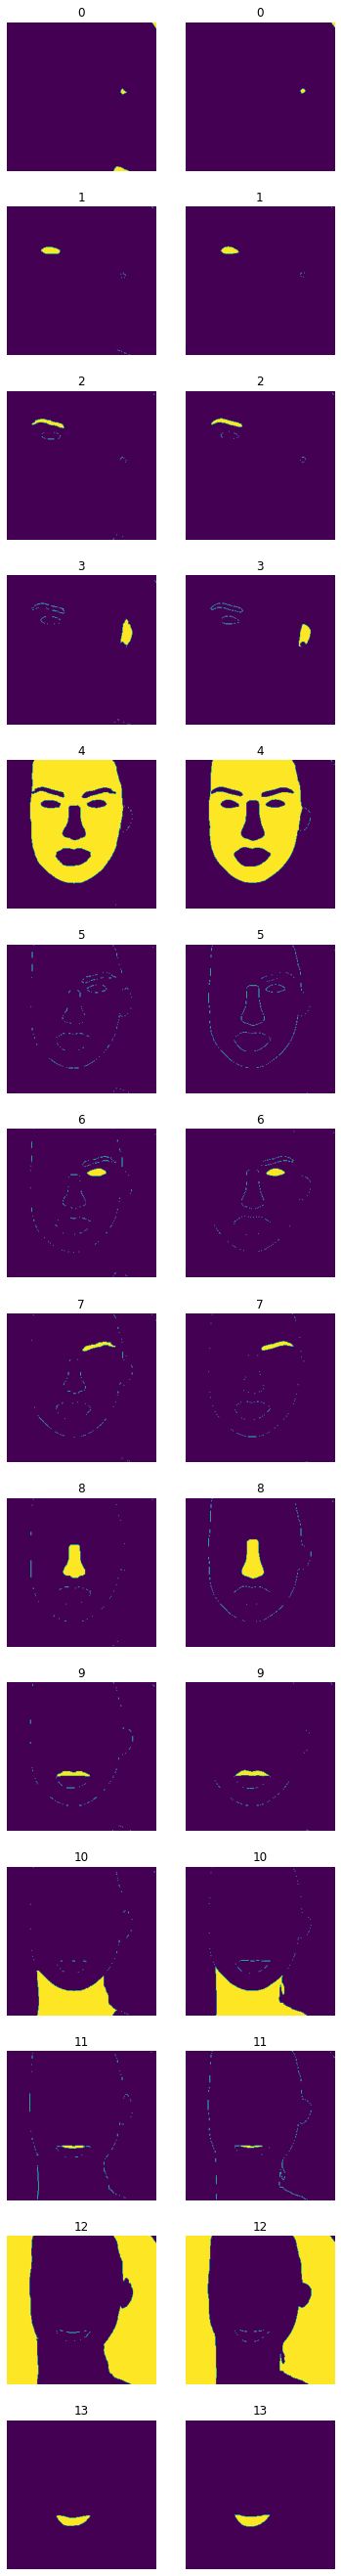

In [4]:
test("test_dataset/test1/images", "test_dataset/test1/parsing/XMY-078.png")

[ 0  1  2  3  4  5  6  7  9 10 12 13 14 16 17]


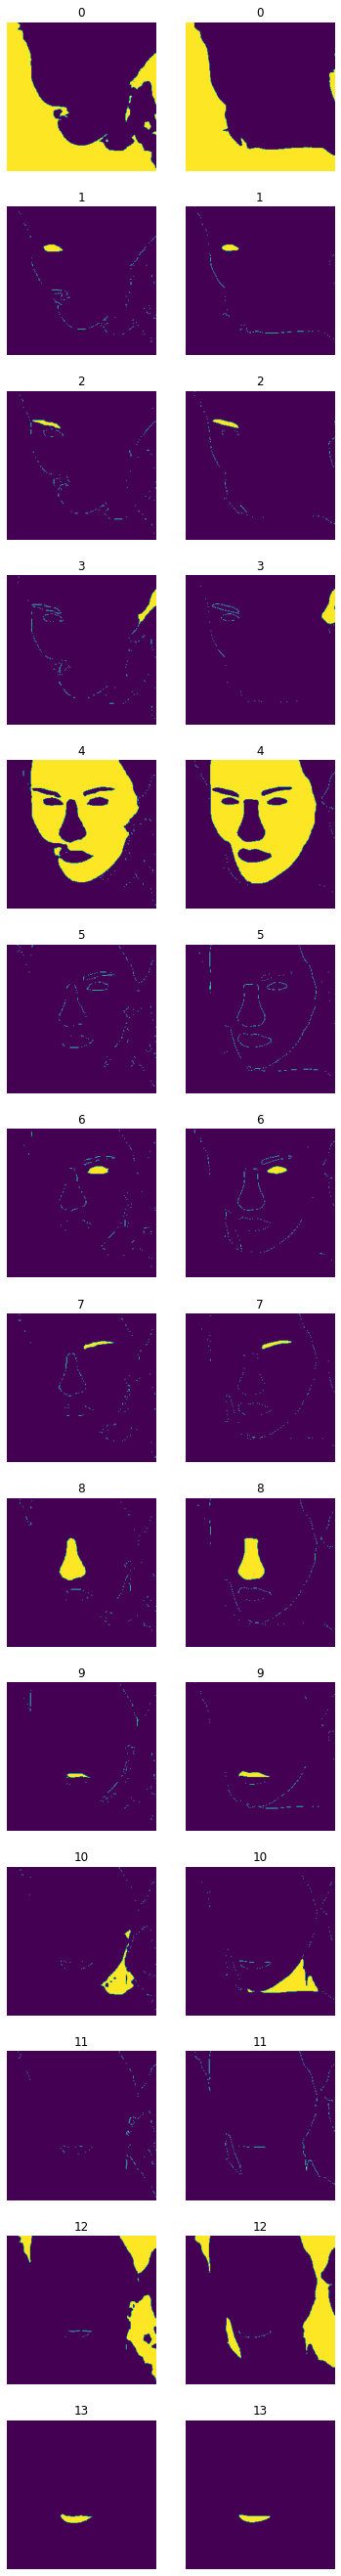

In [5]:
test("test_dataset/test2/images", "test_dataset/test2/parsing/licEnH3rBjSA.png")

[ 0  1  2  3  4  5  7  8 10 12 13 14 16 17]


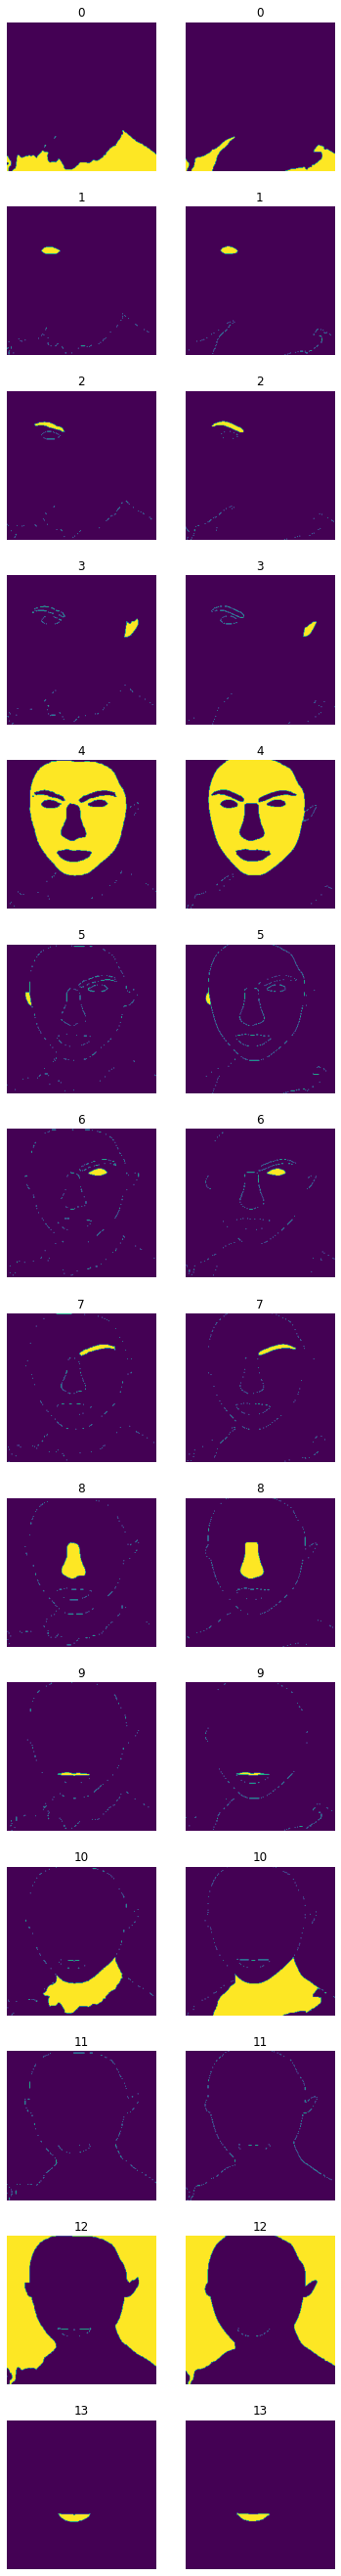

In [6]:
test("test_dataset/test3/images", "test_dataset/test3/parsing/xfsy_0444.png")